# Spotify most streamed songs 2023 data analysis project

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding = 'latin-1')

## Inspecting and Cleaning of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
pd.isnull(df).sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(",", "").astype("float")

In [6]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [7]:
df["in_shazam_charts"].head(15)

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
5      946.0
6      418.0
7      194.0
8      953.0
9      339.0
10     251.0
11     168.0
12    1021.0
13    1281.0
14       NaN
Name: in_shazam_charts, dtype: float64

In [8]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [9]:
df["in_shazam_charts"].mean()

59.99557032115172

In [10]:
df["in_shazam_charts"] = df["in_shazam_charts"].fillna(60)

In [11]:
df["in_shazam_charts"].isnull().sum()

0

In [12]:
df["key"] = df["key"].ffill()

In [13]:
df["key"].isnull().sum()

0

In [14]:
df["streams"] = df["streams"].replace("BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3")

C:\Users\DELL\AppData\Local\Temp\ipykernel_1096\2731582040.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df["streams"] = df["streams"].replace("BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3")


In [15]:
df["streams"] = df["streams"].astype("int64")
df["streams"].mean()

514192847.1017838

In [16]:
df["streams"] = df["streams"].fillna(514192847)

In [17]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141928e+08,67.812172,51.908709,2.666317,59.995803,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.665617e+08,86.441493,50.630241,6.035599,156.871843,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,0.000000,4.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,54.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [18]:
df["released_date"] = df["released_day"].astype(str)+"/"+ df["released_month"].astype(str)+"/"+ df["released_year"].astype(str)
df["released_date"] = pd.to_datetime(df["released_date"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_1096\3477618114.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["released_date"] = pd.to_datetime(df["released_date"])


In [19]:
df["month_name"] = df["released_date"].dt.strftime("%b")
df["Year"] = df["released_date"].dt.strftime("%y")
df["Day"] = df["released_date"].dt.strftime("%A")

In [35]:
df["streams"] = (df["streams"]// 1000)

In [21]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,month_name,Year,Day
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381,43,...,89,83,31,0,8,4,2023-07-14,Jul,23,Friday
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716,48,...,61,74,7,0,10,4,2023-03-23,Mar,23,Thursday
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003,94,...,32,53,17,0,31,6,2023-06-30,Jun,23,Friday
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840,116,...,58,72,11,0,11,15,2019-08-23,Aug,19,Friday
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236,84,...,23,80,14,63,11,6,2023-05-18,May,23,Thursday


# Data Visualization

## Q1. What are the top 10 most streamed songs on Spotify in 2023?

Text(0.5, 1.0, 'Top 10 most streamed songs on Spotify in 2023')

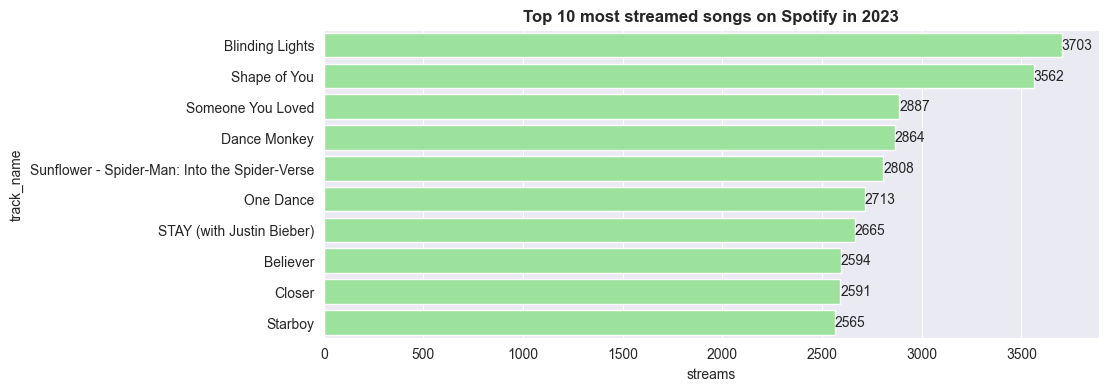

In [36]:
df = df.sort_values(by = "streams", ascending = False)
top10_songs = df.head(10)
plt.figure(figsize=(10, 4))
ax = sns.barplot(data = top10_songs ,x= "streams", y = "track_name", color = "lightgreen")
ax.bar_label(ax.containers[0])
plt.title("Top 10 most streamed songs on Spotify in 2023", fontweight="bold")


## Q2. Top 10 artists based on streams.


Text(0.5, 1.0, 'Top 10 Artist based on Streams')

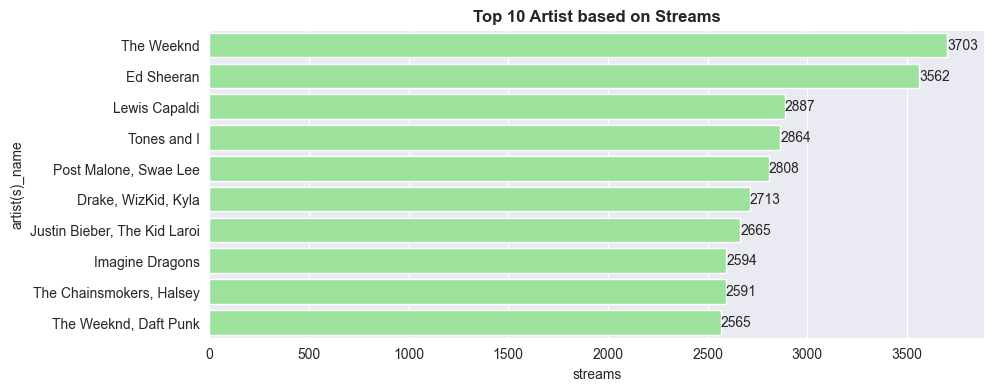

In [37]:
df = df.sort_values(by = "streams", ascending = False)
top10_songs = df.head(10)
plt.figure(figsize=(10, 4))
ax = sns.barplot(data = top10_songs ,x= "streams", y = "artist(s)_name", color = "lightgreen")
ax.bar_label(ax.containers[0])
plt.title("Top 10 Artist based on Streams", fontweight="bold")

## Q3. Top 10 artist or group has the most songs in most streamed songs in 2023?


Text(0.5, 1.0, 'Top 10 Artist based on count of songs')

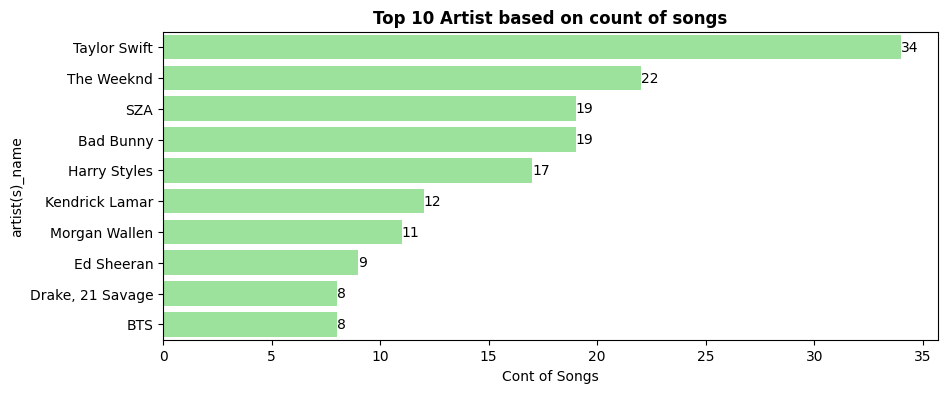

In [24]:
ta = df.groupby("artist(s)_name").agg({"track_name":"count"})
a = ta.sort_values("track_name", ascending= False)
top10_songs= a.head(10)
plt.figure(figsize=(10,4))
ax = sns.barplot(data = top10_songs, x= "track_name", y= "artist(s)_name", color = "lightgreen")
ax.bar_label(ax.containers[0])
plt.xlabel("Cont of Songs")
plt.title("Top 10 Artist based on count of songs", fontweight="bold")

### Insights: Taylor Swift top the Table with 34 songs in most streamed songs. And have very big margin with no 2 The weekend

## Q4. Which artist or group has the most songs in the top 50 most streamed songs in 2023?


In [25]:
top50_songs = df.head(50)
a = top50_songs.groupby("artist(s)_name").agg({"streams": "sum", "track_name":"count"})
a.sort_values("artist(s)_name", ascending = False)
a.idxmax()


streams       Ed Sheeran
track_name    Ed Sheeran
dtype: object

### Insights: Ed Sheeran has the maximum number of songs(4) in top 50

## Q5. Majorly used key in most streamed songs in 2023?


In [26]:
df["key"].head(10)

55     C#
179    C#
86     C#
620    F#
41      D
162    C#
84     C#
140    A#
725    G#
48      G
Name: key, dtype: object

Text(0.5, 1.0, 'Count of songs per key')

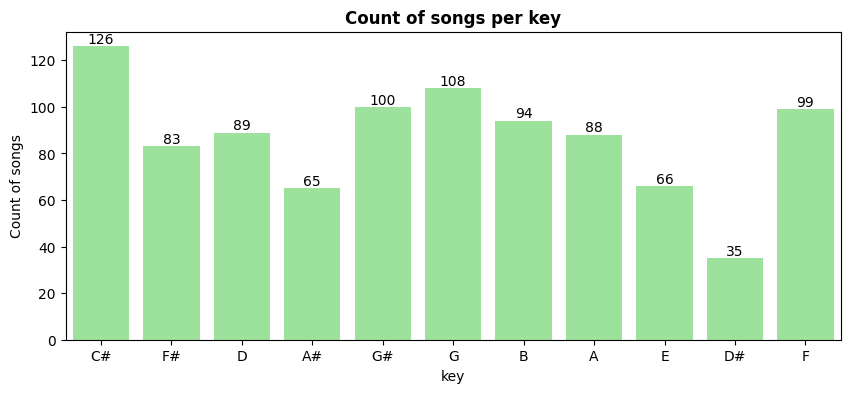

In [27]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data = df, x="key", color="lightgreen")
ax.bar_label(ax.containers[0])
plt.ylabel("Count of songs")
plt.title("Count of songs per key", fontweight="bold")

### Insights: C# is most used key in songs

## Q6. Which musical modes appear more frequently among the top streamed songs in 2023?

Text(0.5, 1.0, 'Count of songs per mode')

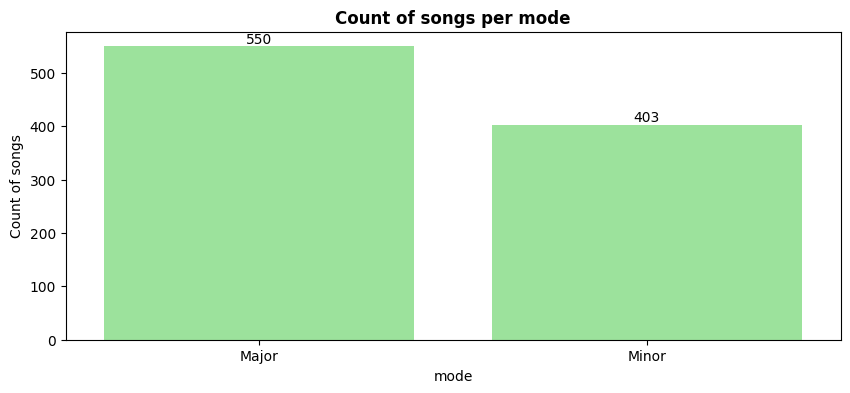

In [28]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data = df, x="mode", color="lightgreen")
ax.bar_label(ax.containers[0])
plt.ylabel("Count of songs")
plt.title("Count of songs per mode", fontweight="bold")

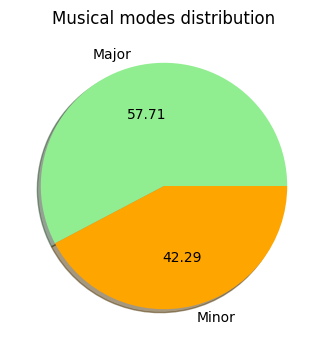

In [29]:
mc= df.groupby("mode").agg({"track_name":"count"})
mc
plt.figure(figsize = (10,4))
plt.pie(mc["track_name"],labels = mc.index, autopct = "%1.2f", shadow = True, colors = ["lightgreen","orange"])
plt.title("Musical modes distribution")
plt.show()

### Insights: As you can see cleary 57.71 % of songs uses Major Note

## Q7. What is the average tempo (BPM) of the most streamed songs in 2023? Are there any outliers?

Text(0.5, 1.0, 'BPM distribution of most streamed songs')

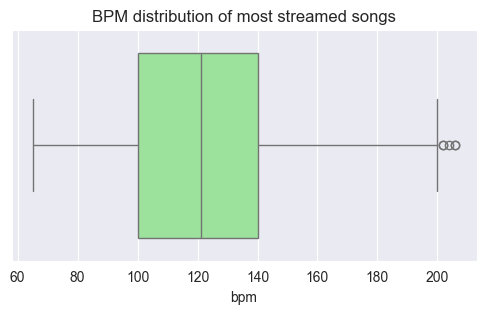

In [30]:
df["bpm"].mean() #mean = 122.54
plt.figure(figsize= (6,3))
sns.set_style(style = "darkgrid")
ax = sns.boxplot(data = df, x = "bpm", color = "lightgreen")
plt.title("BPM distribution of most streamed songs")

### Insights: The average beats per minute(BPM) of the most streamed songs is 122.54 and their is 3 outliers (202, 204, 206).


## Q8. In which month maximum songs released?


Text(0.5, 1.0, 'Songs count as per month')

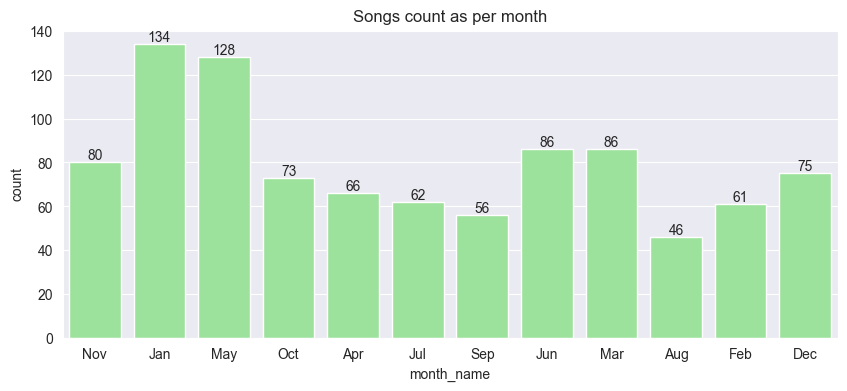

In [31]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data= df, x="month_name", color = "lightgreen" )
ax.bar_label(ax.containers[0])
plt.title("Songs count as per month")

### Insights: As you can see January month have maximum songs(134) released.


## Q9. Explore patterns in audio features to understand trends and preferences in popular songs.

In [32]:
df = df.sort_values(by = "streams", ascending = False)
top_10 = df.head(10)

Text(0.5, 1.0, 'Audio features of top 10 streamed songs')

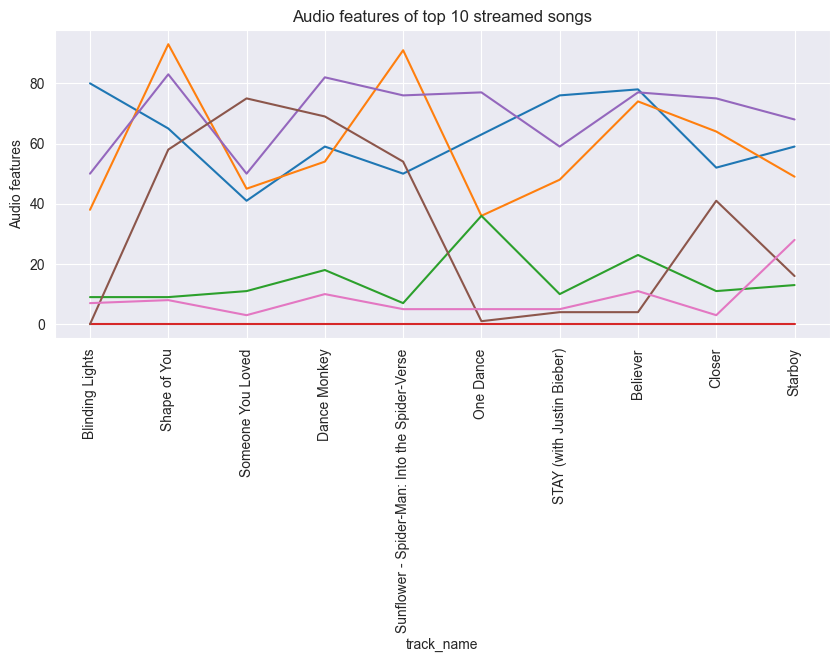

In [33]:
plt.figure(figsize = (10,4))
plt.plot(top_10["track_name"], top_10["energy_%"], label = "energy %")
plt.plot(top_10["track_name"], top_10["valence_%"], label = "valence_%")
plt.plot(top_10["track_name"], top_10["liveness_%"], label = "liveness_%")
plt.plot(top_10["track_name"], top_10["instrumentalness_%"], label = "instrumentalness_%")
plt.plot(top_10["track_name"], top_10["danceability_%"], label = "danceability_%")
plt.plot(top_10["track_name"], top_10["acousticness_%"], label = "acousticness_%")
plt.plot(top_10["track_name"], top_10["speechiness_%"], label = "speechiness_%")
plt.legend
plt.xticks(rotation = 90)
plt.xlabel("track_name")
plt.ylabel("Audio features")
plt.title("Audio features of top 10 streamed songs")

### Observations indicate that within the top 10 songs, energy consistently registers above 40, suggesting a lively and vibrant musical experience. Valence, indicating positivity, also tends to be high. Liveness, however, tends to be below 40, suggesting a preference for studio-recorded tracks over live performances. Instrumentalness consistently hovers around 0, indicating a prevalence of vocals in the songs. Danceability scores exceed 50 in all cases, implying a collective inclination towards dance-worthy tunes. Acousticness varies, with some songs featuring high acoustic elements and others leaning towards lower values. Speechiness remains consistently below 10, suggesting a tendency towards non-lyrical or less spoken-word content. In summary, the top 10 songs are characterized by high energy, danceability, and overall positive content.

## Q10. Compare songs popularity accross different music platform

Text(0.5, 1.0, 'Songs popularity on different playlists')

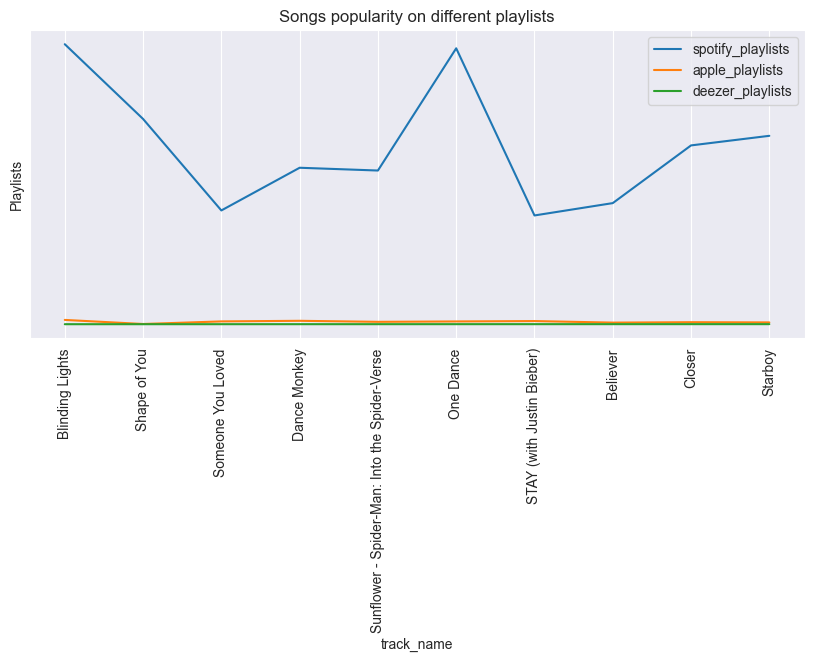

In [38]:
top_10.head(2)
plt.figure(figsize = (10,4))
plt.plot(top_10["track_name"],top_10["in_spotify_playlists"], label = "spotify_playlists")
plt.plot(top_10["track_name"], top_10["in_apple_playlists"], label = "apple_playlists")
plt.plot(top_10["track_name"], top_10["in_deezer_playlists"], label = "deezer_playlists")
plt.xticks(rotation= 90)
plt.legend()
plt.yticks([])
plt.xlabel("track_name")
plt.ylabel("Playlists")
plt.title("Songs popularity on different playlists")

### Analysis reveals that the top 10 streamed songs exhibit popularity primarily within Spotify playlists, garnering streams ranging from 20,000 to 50,000. This trend is mirrored in both Deezer and Apple Music playlists, with Apple playlist streams averaging around 500 and Deezer playlist streams hovering around 3,000.